# Hierarchical Clustering (UMAP)

<br> 

Throughout this notebook, the original datasets shall be reduced in dimensions via the utilization of Uniform Manifold Approximation and Projection for Dimension Reduction and a Agglomerative Clustering model will further be implemented on both the new Zero and Nonzero Datasets.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [UMAP](#22.1)
* [Modelling Zero Data](#22.3)
    * [Elbow & Silhoutte: UMAP Zero](#23.3)
        * [Zero: Hierarchical Clustering](#M12)
        * [Zero Visualisation](#N00)
* [Modelling Nonzero Data](#MU)
    * [Elbow & Silhoutte: UMAP Nonzero](#NN)
        * [Nonzero: Hierarchical Clustering](#M17)
        * [Nonzero Visualisation](#N0)

<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means
#!pip install umap-learn

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo
from yellowbrick.cluster import KElbowVisualizer

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
#from umap import UMAP
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

import umap.umap_ as UMAP

In [3]:
# Import the zero dataset 

final_zero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\final_zero.csv')
final_zero.drop(columns=['Unnamed: 0'], inplace=True)
tra_zero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\tra_zero.csv')
tra_zero.drop(columns=['Unnamed: 0'], inplace=True)
zero_df = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\zero_df.csv')
zero_df.drop(columns=['Unnamed: 0'], inplace=True)

# Import the nonzero dataset 

final_nonzero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\final_nonzero.csv')
final_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
tra_nonzero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\tra_nonzero.csv')
tra_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
nonzero_df = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\nonzero_df.csv')
nonzero_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
final_zero.head(1)

volume_firm  liabilities_firm  bank_liabilities  other_liabilities  \
0    -0.919737         -1.221589          -1.39815          -0.213653   

         pl  banking_products  new_active_cc  new_passive_cc  \
0 -0.611916         -0.341303      -0.432425        -0.13513   

   new_commission_income  legal  p_membership  p_KK  p_fixeddeposits  \
0              -0.181772   16.0           1.0   1.0              1.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_unionfunds  \
0                  0.0                 0.0   0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank   work  year  risk  \
0                0.0         0.0          0.0         0.0  208.0  13.0   1.0   

   postcode  
0      32.0

In [5]:
tra_zero.head(1)

client_type  legal  branch  volume_firm  liabilities_firm  liabilities  \
0          0.0   16.0    10.0    10.103612          9.181565          0.0   

   bank_liabilities  other_liabilities    pl_firm         pl  \
0               0.0         -11.512925  12.735183  14.697371   

   banking_products  other_products  p_membership  p_KK  p_creditcard  \
0               0.0             0.0           1.0   1.0           0.0   

   p_bankloans  p_fixeddeposits  p_WP2Depot  p_propertyinsurance  \
0          1.0              1.0         0.0                  0.0   

   p_companyinsurance  p_DZ  p_DZP  p_unionfunds  p_buildingsavings  \
0                 0.0   0.0    0.0           0.0                0.0   

   p_mortgage  p_VRleasing  p_teambank  new_active_cc  new_passive_cc  \
0         0.0          0.0         0.0           -0.0        0.050022   

   new_commission_income  new_cmib   work  year  risk  postcode  size  
0              26.431755  3.856511  208.0  13.0   1.0      32.0   1.0

In [6]:
zero_df.head(1)

client_type  legal  branch  volume_firm  volume  loans_approved  \
0          0.0   16.0    10.0     31792.82     0.0             0.0   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0             0.0           6103.29          0.0               0.0   

   other_liabilities   pl_firm         pl  banking_products  other_products  \
0                0.0  47870.67  11518.478               0.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           1.0   1.0           0.0          1.0              1.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0            0.0   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            0.05                  47.25      47.3  208.0  13.0   1.0   

   postcode  size  
0      32.0   1.0

In [7]:
final_nonzero.head(1)

loans_approved  bank_liabilities  other_liabilities        pl  \
0       -0.428154          -0.57338          -0.426741 -1.530136   

   banking_products  new_active_cc  new_commission_income  client_type  legal  \
0         -0.458714       0.300147              -0.464326          0.0   39.0   

   p_membership  p_KK  p_creditcard  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_mortgage  p_VRleasing  \
0                  0.0                 0.0   0.0         0.0          0.0   

   p_teambank   work  year  risk  postcode  
0         0.0  393.0  11.0   0.0      46.0

In [8]:
tra_nonzero.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     8.333568  7.697297         9.93363   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0       10.883836          7.523551    10.231201           9.80453   

   other_liabilities   pl_firm        pl  banking_products  other_products  \
0               -0.0  7.444261  9.518547               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0       5.180153   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0          2.5096              13.890309  5.466413  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

In [9]:
nonzero_df.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     12988.79  12988.79        12988.79   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0        12988.79            748.17       748.17            748.17   

   other_liabilities  pl_firm       pl  banking_products  other_products  \
0                0.0  7388.77  7388.77               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0         177.71   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            12.3                   46.6    236.61  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

# UMAP  <a class="anchor" id="22.1"></a>


We now adopt UMAP to assess whether this can yield better results than the original dataset. <br>

In [10]:
# define the UMAP algorithm

um = UMAP.UMAP(n_neighbors=100, n_components=2, metric='euclidean', 
               n_epochs=1000, learning_rate=1.0, init='random', 
               min_dist=0.1, spread=1.0)
# Zero Dataset
# we apply UMAP to the zero dataset

U_zero = um.fit_transform(final_zero)

# Nonzero Dataset
# we apply UMAP to the zero dataset

U_nonzero = um.fit_transform(final_nonzero)

In [11]:
# UMAP with two components

umm_2d = UMAP.UMAP(n_components=2)

<br>

# Modelling the UMAP DataSet  <a class="anchor" id="23.2"></a>

Once all models have been applied to the Original dataset, we can now focus on the datasets that have been dimensionally reduced. <br><br>
To ensure consistency and standardization we follow the same approach, namely: <br>
- identify the optimal number of clusters
- apply the clustering models.
<br>

## Modelling Zero Data  <a class="anchor" id="22.3"></a>

<br>

### Elbow & Sillhoutte: UMAP  Zero <a class="anchor" id="23.3"></a>

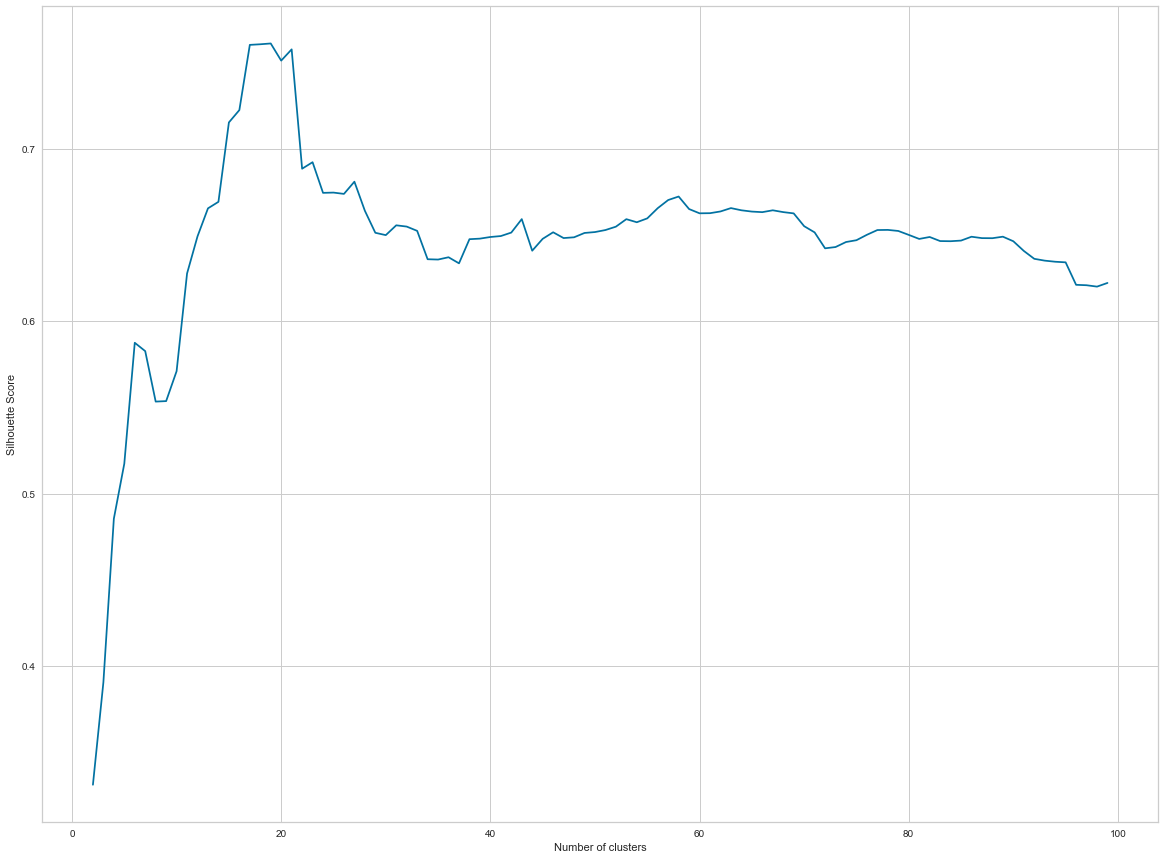

In [12]:
plt.figure(figsize=(20,15))

results = {}
for i in range(2,100):
    m = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='average')
    labelss = m.fit(U_zero)
    labels = m.labels_
    sil_index = silhouette_score(U_zero, labels)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

#### Hierarchical Clustering <a class="anchor" id="M12"></a>

In [13]:
# set the model and the respective parameters

hc_U_zero = AgglomerativeClustering(n_clusters = 19, affinity = 'euclidean', linkage ='average')

# Fit the function to the UMAP zero dataset

hc_U_zero.fit(U_zero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero['Cluster_h_U'] = hc_U_zero.labels_
tra_zero['Cluster_h_U'] = hc_U_zero.labels_

zero_df["Cluster_h_U"] = hc_U_zero.labels_
print('Distribution of Clusters: \n')
print(zero_df['Cluster_h_U'].value_counts())

Distribution of Clusters: 

2     1181
10     552
0      426
6      416
4      415
7      362
14     322
1      304
17     204
11     164
5      163
12     144
9      132
3      123
16      76
15      67
18      52
13      45
8       38
Name: Cluster_h_U, dtype: int64


In [14]:
print('The UMAP performance scores are the following: \n' )
print('Silhouette: ' + str(silhouette_score(U_zero, hc_U_zero.labels_ , metric='euclidean')))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(U_zero, hc_U_zero.labels_ )))
print('Davies Bouldin: ' + str(davies_bouldin_score(U_zero, hc_U_zero.labels_)))

The UMAP performance scores are the following: 

Silhouette: 0.7609168
Calinski Harabasz: 28167.0829409645
Davies Bouldin: 0.28470613270619705


###  Zero Visualisation <a class="anchor" id="N00"></a>

In [15]:
tt = tra_zero.drop(columns=['Cluster_h_U'])

U_2d = pd.DataFrame(umm_2d.fit_transform(tt))


#"U1_2d" means: 'The first component of the components created for 2-D visualization, by UMAP'
#And "U2_2d" means: 'The second component of the components created for 2-D visualization, by UMAP'

U_2d.columns = ["U1_2d", "U2_2d"]


tra_zero1=tra_zero.copy()

tra_zero1 = pd.concat([tra_zero1, U_2d], axis=1, join='inner')

In [16]:
cluster = []
idd = []
for i in tra_zero1["Cluster_h_U"].value_counts().index:
    n = i
    id_ = 'cluster_' + str(n)
    m = str(id_) +  ' = ' + 'tra_zero1[tra_zero1["Cluster_h_U"] == ' + str(n) + ']'
    idd.append(id_)
    cluster.append(m)
    
for i in cluster:
    exec(i)

nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter(x =' + i + '["U1_2d"], y =' + i + '["U2_2d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)

commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a
            
for key, value in commands.items():
    exec (f'{key}={value}')            

In [17]:
for i in l:
    print(i)

tracecluster_2
tracecluster_10
tracecluster_0
tracecluster_6
tracecluster_4
tracecluster_7
tracecluster_14
tracecluster_1
tracecluster_17
tracecluster_11
tracecluster_5
tracecluster_12
tracecluster_9
tracecluster_3
tracecluster_16
tracecluster_15
tracecluster_18
tracecluster_13
tracecluster_8


In [18]:
title = "Visualizing Clusters in Two Dimensions Using UMAP"

layout = dict(title = title,
              xaxis= dict(title= 'U1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'U2',ticklen= 5,zeroline= False)
             )

fig = dict(data = [tracecluster_2,
tracecluster_10,
tracecluster_0,
tracecluster_6,
tracecluster_4,
tracecluster_7,
tracecluster_14,
tracecluster_1,
tracecluster_17,
tracecluster_11,
tracecluster_5,
tracecluster_12,
tracecluster_9,
tracecluster_3,
tracecluster_16,
tracecluster_15,
tracecluster_18,
tracecluster_13,
tracecluster_8], layout = layout)

pyo.iplot(fig)
    

##  Modelling Nonzero Data<a class="anchor" id="MU"></a>

###  Elbow and Silhouette: Non-Zero UMAP <a class="anchor" id="NN"></a>

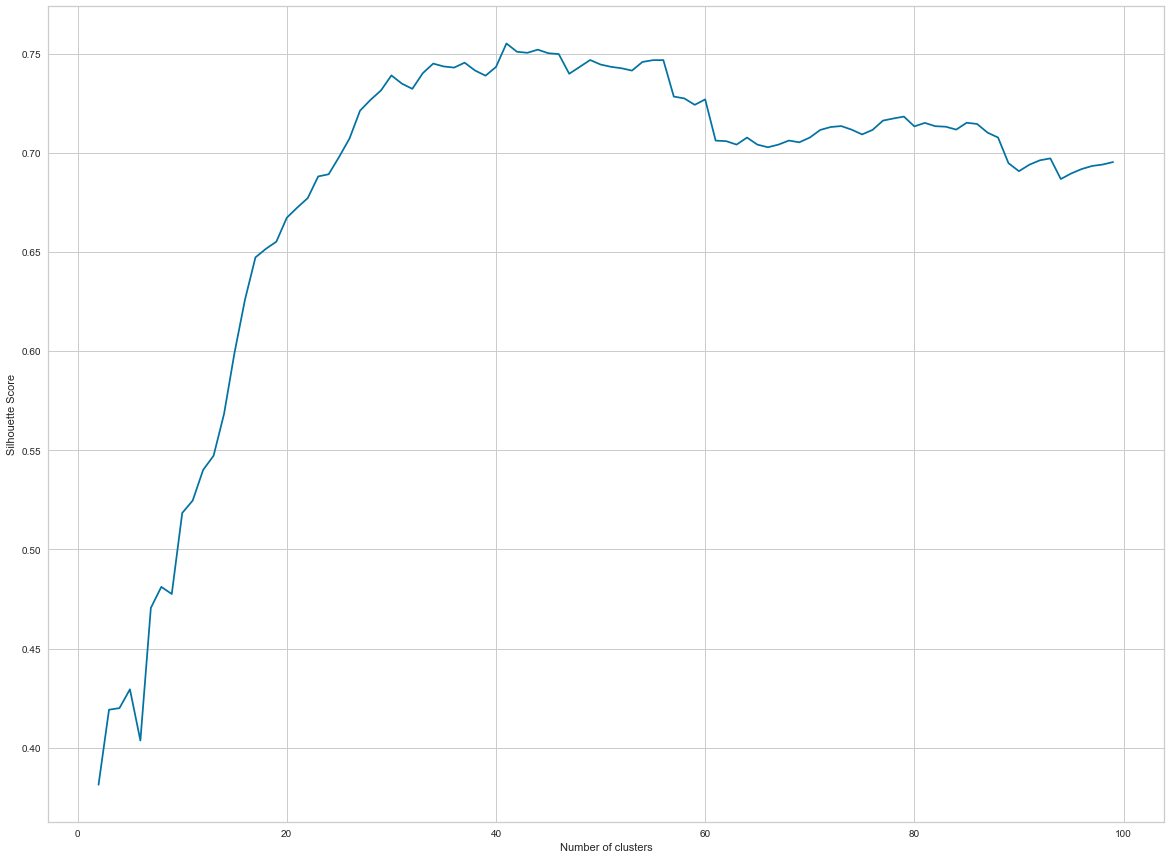

In [19]:
plt.figure(figsize=(20,15))

results = {}
for i in range(2,100):
    m = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='average')
    labelss = m.fit(U_nonzero)
    labels = m.labels_
    sil_index = silhouette_score(U_nonzero, labels)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

#### Hierarchical Clustering <a class="anchor" id="M17"></a>

In [20]:
# set the model and the respective parameters

hc_U_nonzero = AgglomerativeClustering(n_clusters = 41, affinity = 'euclidean', linkage ='average')

# Fit the function to the UMAP nonzero dataset

hc_U_nonzero.fit(U_nonzero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero['Cluster_h_U'] = hc_U_nonzero.labels_
tra_nonzero['Cluster_h_U'] = hc_U_nonzero.labels_

nonzero_df["Cluster_h_U"] = hc_U_nonzero.labels_
print('Distribution of Clusters: \n')
print(nonzero_df['Cluster_h_U'].value_counts())

Distribution of Clusters: 

11    977
15    740
0     654
2     645
7     595
13    559
14    543
12    523
1     498
3     486
34    441
27    389
26    354
8     352
6     330
40    325
16    318
9     316
19    316
4     311
33    306
25    280
22    264
28    261
5     253
21    242
18    237
23    230
29    229
10    226
31    223
32    193
17    154
37    151
30    150
39    149
24    149
20    145
36    114
38     99
35     80
Name: Cluster_h_U, dtype: int64


In [21]:
print('The UMAP performance scores are the following: \n' )
print('Silhouette: ' + str(silhouette_score(U_nonzero, hc_U_nonzero.labels_ , metric='euclidean')))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(U_nonzero, hc_U_nonzero.labels_ )))
print('Davies Bouldin: ' + str(davies_bouldin_score(U_nonzero, hc_U_nonzero.labels_)))

The UMAP performance scores are the following: 

Silhouette: 0.7551611
Calinski Harabasz: 140526.9112583972
Davies Bouldin: 0.33983507551574604


###   Non-Zero Visualisation <a class="anchor" id="N0"></a>

In [23]:
tt = tra_nonzero.drop(columns=['Cluster_h_U'])

U_2d = pd.DataFrame(umm_2d.fit_transform(tt))


#"U1_2d" means: 'The first component of the components created for 2-D visualization, by UMAP.'
#And "U2_2d" means: 'The second component of the components created for 2-D visualization, by UMAP.'


U_2d.columns = ["U1_2d", "U2_2d"]


tra_nonzero1=tra_nonzero.copy()

tra_nonzero1 = pd.concat([tra_nonzero1, U_2d], axis=1, join='inner')

In [24]:
cluster = []
idd = []
for i in tra_nonzero1["Cluster_h_U"].value_counts().index:
    n = i
    id_ = 'cluster_' + str(n)
    m = str(id_) +  ' = ' + 'tra_nonzero1[tra_nonzero1["Cluster_h_U"] == ' + str(n) + ']'
    idd.append(id_)
    cluster.append(m)
    
for i in cluster:
    exec(i)

nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter(x =' + i + '["U1_2d"], y =' + i + '["U2_2d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)

commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a
            
for key, value in commands.items():
    exec (f'{key}={value}') 

In [25]:
for i in l:
    print(i)

tracecluster_11
tracecluster_15
tracecluster_0
tracecluster_2
tracecluster_7
tracecluster_13
tracecluster_14
tracecluster_12
tracecluster_1
tracecluster_3
tracecluster_34
tracecluster_27
tracecluster_26
tracecluster_8
tracecluster_6
tracecluster_40
tracecluster_16
tracecluster_9
tracecluster_19
tracecluster_4
tracecluster_33
tracecluster_25
tracecluster_22
tracecluster_28
tracecluster_5
tracecluster_21
tracecluster_18
tracecluster_23
tracecluster_29
tracecluster_10
tracecluster_31
tracecluster_32
tracecluster_17
tracecluster_37
tracecluster_30
tracecluster_39
tracecluster_24
tracecluster_20
tracecluster_36
tracecluster_38
tracecluster_35


In [26]:
title = "Visualizing Clusters in Two Dimensions Using UMAP"

layout = dict(title = title,
              xaxis= dict(title= 'U1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'U2',ticklen= 5,zeroline= False)
             )

fig = dict(data = [tracecluster_11,
tracecluster_15,
tracecluster_0,
tracecluster_2,
tracecluster_7,
tracecluster_13,
tracecluster_14,
tracecluster_12,
tracecluster_1,
tracecluster_3,
tracecluster_34,
tracecluster_27,
tracecluster_26,
tracecluster_8,
tracecluster_6,
tracecluster_40,
tracecluster_16,
tracecluster_9,
tracecluster_19,
tracecluster_4,
tracecluster_33,
tracecluster_25,
tracecluster_22,
tracecluster_28,
tracecluster_5,
tracecluster_21,
tracecluster_18,
tracecluster_23,
tracecluster_29,
tracecluster_10,
tracecluster_31,
tracecluster_32,
tracecluster_17,
tracecluster_37,
tracecluster_30,
tracecluster_39,
tracecluster_24,
tracecluster_20,
tracecluster_36,
tracecluster_38,
tracecluster_35], layout = layout)

pyo.iplot(fig)
    